In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
os.chdir("/Users/shree/Desktop/MLP")

In [3]:
os.listdir()

['bank_cleaned.csv',
 'income_evaluation.csv',
 'Marketing Data KNN Classification.ipynb.webarchive',
 'Real_fake_news.csv',
 'BANK KNN CLASSIFICATION.ipynb',
 'German credit risk using Decision tree and Knn classifier.ipynb',
 '.gitattributes',
 'KNN_Loan Approval Prediction.ipynb',
 '.git',
 'train_u6lujuX_CVtuZ9i (1).csv',
 'german_credit_data.csv']

In [4]:
A= pd.read_csv("income_evaluation.csv")

In [6]:
A.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
A.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
A.shape

(32561, 15)

In [9]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
A.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
A.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [12]:
len(A.columns)

15

In [14]:
A['age'][0:5]

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [15]:
A.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [16]:
A.columns = list(map(lambda a: a.lstrip(), A.columns))
A.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
A['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [20]:
shape0 = A.shape[0]
for column in A.columns:
    A[column].replace(' ?', np.NaN, inplace=True)
A = A.dropna().reset_index().drop(columns=['index'])
shape1 = A.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [21]:
income = A.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

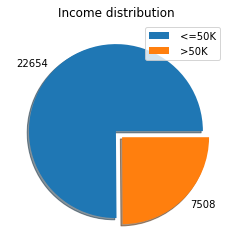

In [24]:
explode = [0, 0.1]
plt.pie(income, labels=income.values, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [26]:
A['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [27]:
stats = A.select_dtypes(['float', 'int64']).drop(columns=['income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

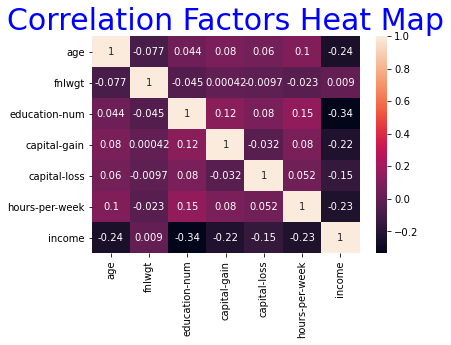

In [28]:
sns.heatmap(A.corr(), annot=True).set_title('Correlation Factors Heat Map', color='blue', size='30')

In [29]:
A_final = pd.get_dummies(A)
A_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = A_final.drop(columns=['income'])
y = A_final['income']
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
ct = dtree(
           criterion="entropy",   
           max_depth=None       
                             
           )

_=ct.fit(X_train,y_train)

In [32]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.8082661067521273

In [33]:
fi = ct.feature_importances_
fi

array([1.30077398e-01, 1.85746359e-01, 1.02192318e-01, 1.01629370e-01,
       3.57492499e-02, 6.50217281e-02, 4.88921983e-03, 7.32118943e-03,
       1.16822910e-02, 6.59244339e-03, 8.70142402e-03, 4.23676346e-03,
       0.00000000e+00, 5.71838857e-04, 5.84217533e-04, 3.75820328e-04,
       0.00000000e+00, 0.00000000e+00, 6.14418074e-04, 2.58088725e-04,
       1.78213409e-03, 3.35544031e-03, 2.09516477e-03, 6.17116339e-04,
       2.48374929e-03, 1.66203588e-03, 0.00000000e+00, 5.11750704e-04,
       3.48176168e-03, 1.74775680e-03, 4.86853869e-04, 1.86123756e-01,
       1.18400813e-03, 3.56111418e-03, 1.55704933e-03, 1.70681278e-03,
       4.67399249e-03, 0.00000000e+00, 7.87294419e-03, 1.03304641e-02,
       3.29101646e-03, 3.65137411e-03, 6.24904057e-03, 4.73504819e-03,
       0.00000000e+00, 7.25608425e-03, 2.87397335e-03, 7.48359708e-03,
       4.86604289e-03, 5.79203720e-03, 2.66979646e-03, 2.64177814e-03,
       1.76671083e-03, 2.19721303e-03, 1.67168943e-03, 4.16138783e-03,
      

In [35]:
list(zip(A.columns, fi))

[('age', 0.13007739788230124),
 ('workclass', 0.18574635870680786),
 ('fnlwgt', 0.10219231827100567),
 ('education', 0.10162937037996746),
 ('education-num', 0.03574924989952894),
 ('marital-status', 0.06502172810978814),
 ('occupation', 0.004889219832444757),
 ('relationship', 0.007321189432510463),
 ('race', 0.011682291048564952),
 ('sex', 0.006592443393324187),
 ('capital-gain', 0.008701424016538627),
 ('capital-loss', 0.004236763463524465),
 ('hours-per-week', 0.0),
 ('native-country', 0.0005718388568588894),
 ('income', 0.0005842175332215882)]

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8512542822411316
